In [1]:
import os
import pickle
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize
import numpy as np

import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prepare data
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/01062023'
CATEGORIES = ['calm', 'uncalm']
IMG_SIZE= 224

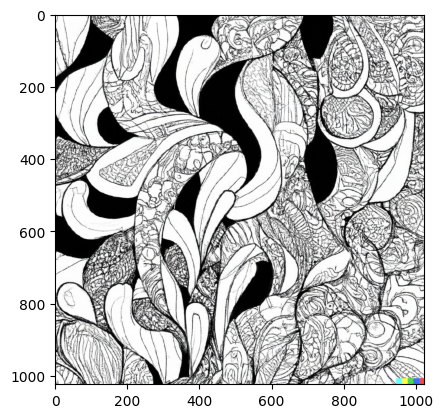

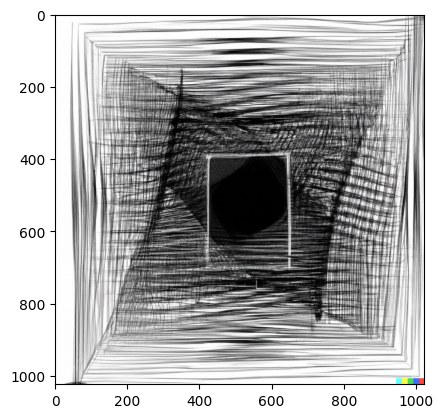

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    #break

In [5]:
import glob
all_images = []
labels = []
for path in glob.glob("/content/drive/MyDrive/Binary Classification Learn Dataset/01062023/*"):
    label = path.split("/")[-1]
    for image_path in glob.glob(os.path.join(path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        all_images.append(image)
        labels.append(label)
all_images = np.array(all_images)
labels = np.array(labels)

In [6]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

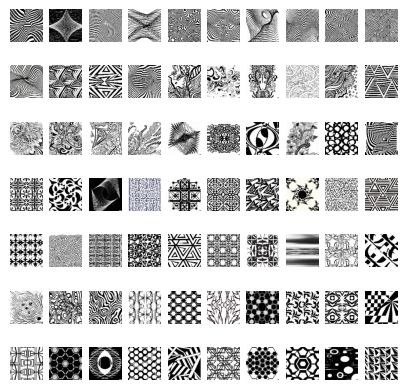

In [7]:
plot_image_grid(all_images[940:1010], 7, 10)

In [8]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

1022


In [10]:
lenofimage = len(training_data)

In [11]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [12]:
X.shape

(1022, 150528)

In [13]:
X = X/255.0

In [14]:
X[1]

array([0.99215686, 0.98823529, 0.99215686, ..., 1.        , 0.2745098 ,
       0.23529412])

In [15]:
y=np.array(y)

In [16]:
y.shape

(1022,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [18]:
from sklearn.svm import SVC
svc = SVC(C = 1, kernel='rbf',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [19]:
y2 = svc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6048780487804878


In [21]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.59      0.65      0.62       100
           1       0.63      0.56      0.59       105

    accuracy                           0.60       205
   macro avg       0.61      0.61      0.60       205
weighted avg       0.61      0.60      0.60       205



In [22]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [23]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
200,0,0
201,1,1
202,1,0
203,0,1


### Tuning Hyperparameter GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 100],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.524 total time= 1.8min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.537 total time= 1.7min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.552 total time= 1.7min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.515 total time= 1.7min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.534 total time= 1.7min
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.610 total time= 1.4min
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.555 total time= 1.4min
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.613 total time= 1.3min
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.528 total time= 1.4min
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.577 total time= 1.4min
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.506 total time= 1.4min
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [34]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [35]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=100, gamma=0.0001)


In [36]:
test_predictions = grid.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 64.878049


In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6048780487804878


In [38]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.59      0.65      0.62       100
           1       0.63      0.56      0.59       105

    accuracy                           0.60       205
   macro avg       0.61      0.61      0.60       205
weighted avg       0.61      0.60      0.60       205



In [39]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [40]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
200,0,0
201,1,1
202,1,0
203,0,1


In [25]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 10],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time= 2.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 1.8min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time= 1.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time= 1.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time= 1.8min
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.610 total time= 1.4min
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.555 total time= 1.4min
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.613 total time= 1.4min
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.528 total time= 1.4min
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.577 total time= 1.4min
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.506 total time= 1.5min
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [26]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [27]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


In [28]:
test_predictions = grid.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 64.878049


In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6048780487804878


In [30]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.59      0.65      0.62       100
           1       0.63      0.56      0.59       105

    accuracy                           0.60       205
   macro avg       0.61      0.61      0.60       205
weighted avg       0.61      0.60      0.60       205



In [31]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [32]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
200,0,0
201,1,1
202,1,0
203,0,1
